In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

file_path = "experiments/experiment_result_9x9.csv"

data = pd.read_csv(file_path)
colorblind_palette = sns.color_palette("colorblind")
dpll_color =  colorblind_palette[0]
chb_color =  colorblind_palette[2]
vsids_color = colorblind_palette[3]

# Create a DataFrame
df = pd.DataFrame(data)

print(df.columns)




Index(['basic_DPLL_backtracks', 'basic_DPLL_clause_simplifications',
       'basic_DPLL_conflicts', 'basic_DPLL_decisions',
       'basic_DPLL_elapsed_time', 'basic_DPLL_implications',
       'basic_DPLL_is_satisfied', 'basic_DPLL_is_solution_valid',
       'basic_DPLL_pure_literals', 'basic_DPLL_recursions',
       'CHB_conflicts_counter', 'CHB_decision_counter', 'CHB_elapsed_time',
       'CHB_failed_backjumps_counter', 'CHB_implications_counter',
       'CHB_is_satisfied', 'CHB_is_solution_valid', 'CHB_learned_counter',
       'CHB_successful_backjumps_counter', 'unsolved_sudoku',
       'unsolved_sudoku_number_of_clues',
       'unsolved_sudoku_number_of_unknown_positions',
       'unsolved_sudoku_total_of_characters', 'VSIDS_conflicts_counter',
       'VSIDS_decision_counter', 'VSIDS_elapsed_time',
       'VSIDS_failed_backjumps_counter', 'VSIDS_implications_counter',
       'VSIDS_is_satisfied', 'VSIDS_is_solution_valid',
       'VSIDS_learned_counter', 'VSIDS_successful_backjump

In [50]:
# Relevant averages
averages = {
    "DPLL_Conflicts": df["basic_DPLL_conflicts"].mean(),
    "CHB_Conflicts": df["CHB_conflicts_counter"].mean(),
    "VSIDS_Conflicts": df["VSIDS_conflicts_counter"].mean(),
    "DPLL_Decisions": df["basic_DPLL_decisions"].mean(),
    "CHB_Decisions": df["CHB_decision_counter"].mean(),
    "VSIDS_Decisions": df["VSIDS_decision_counter"].mean(),
    "DPLL_Implications": df["basic_DPLL_implications"].mean(),
    "CHB_Implications": df["CHB_implications_counter"].mean(),
    "VSIDS_Implications": df["VSIDS_implications_counter"].mean(),
    "DPLL_Elapsed_Time": df["basic_DPLL_elapsed_time"].mean(),
    "CHB_Elapsed_Time": df["CHB_elapsed_time"].mean(),
    "VSIDS_Elapsed_Time": df["VSIDS_elapsed_time"].mean(),
    "CHB_Learned_Clauses": df["CHB_learned_counter"].mean(),
    "VSIDS_Learned_Clauses": df["VSIDS_learned_counter"].mean(),
}

In [51]:

metrics = ['Conflicts', 'Decisions']
dpll_values = [averages['DPLL_Conflicts'], averages['DPLL_Decisions']]
chb_values = [averages['CHB_Conflicts'], averages['CHB_Decisions']]
vsids_values = [averages['VSIDS_Conflicts'], averages['VSIDS_Decisions']]


In [52]:
#  Implications data
implications = {
    "DPLL": averages["DPLL_Implications"],
    "CHB": averages["CHB_Implications"],
    "VSIDS": averages["VSIDS_Implications"],
}
solvers = list(implications.keys())
implication_values = list(implications.values())

elapsed_time = [averages["DPLL_Elapsed_Time"], averages["CHB_Elapsed_Time"], averages["VSIDS_Elapsed_Time"]]

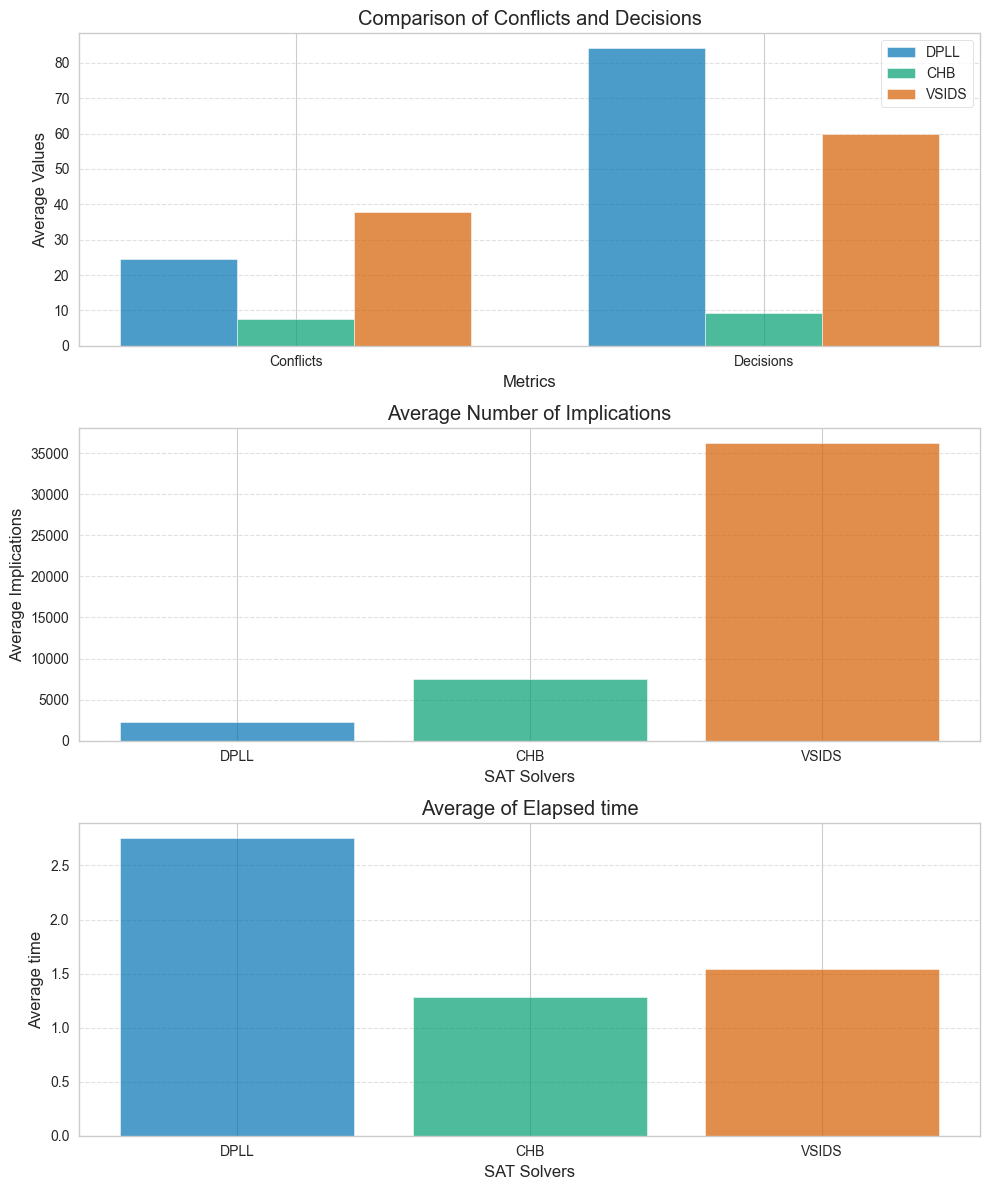

In [86]:

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 12))

# First subplot: Comparison of Conflicts and Decisions
ax1 = axes[0]
bar_width = 0.25  # width of the bars
x = range(len(metrics))  # x positions for each metric
ax1.bar(x, dpll_values, width=bar_width, label='DPLL', alpha=0.7)
ax1.bar([p + bar_width for p in x], chb_values, width=bar_width, label='CHB', alpha=0.7)
ax1.bar([p + 2*bar_width for p in x], vsids_values, width=bar_width, label='VSIDS', alpha=0.7)
ax1.set_title("Comparison of Conflicts and Decisions")
ax1.set_xlabel("Metrics")
ax1.set_ylabel("Average Values")
ax1.set_xticks([p + bar_width for p in x])
ax1.set_xticklabels(metrics)
ax1.legend()
ax1.grid(axis='y', linestyle='--', alpha=0.6)

# Second subplot: Implications
ax2 = axes[1]
ax2.bar(solvers, implication_values, color=[dpll_color, chb_color, vsids_color], alpha=0.7)
ax2.set_title("Average Number of Implications")
ax2.set_xlabel("SAT Solvers")
ax2.set_ylabel("Average Implications")
ax2.grid(axis='y', linestyle='--', alpha=0.6)

ax3 = axes[2]
ax3.bar(solvers, elapsed_time, color=[dpll_color, chb_color, vsids_color], alpha=0.7)
ax3.set_title("Average of Elapsed time")
ax3.set_xlabel("SAT Solvers")
ax3.set_ylabel("Average time")
ax3.grid(axis='y', linestyle='--', alpha=0.6)

# Adjust layout
plt.tight_layout()
plt.show()


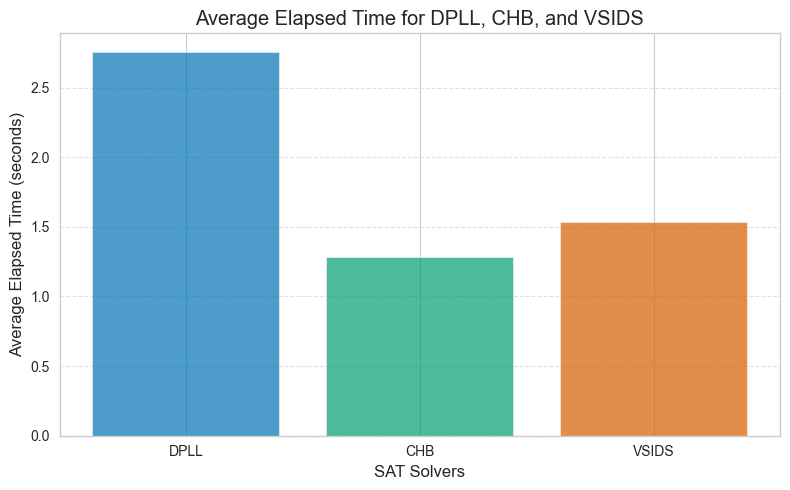

In [87]:

# Elapsed time averages 
elapsed_time_averages = {
    "DPLL": averages["DPLL_Elapsed_Time"],
    "CHB": averages["CHB_Elapsed_Time"],
    "VSIDS": averages["VSIDS_Elapsed_Time"],
}


solvers = list(elapsed_time_averages.keys())
elapsed_time_values = list(elapsed_time_averages.values())

# Plot the bar graph for elapsed time
plt.figure(figsize=(8, 5))
plt.bar(solvers, elapsed_time_values,color=[dpll_color, chb_color, vsids_color], alpha=0.7)
plt.title("Average Elapsed Time for DPLL, CHB, and VSIDS")
plt.xlabel("SAT Solvers")
plt.ylabel("Average Elapsed Time (seconds)")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

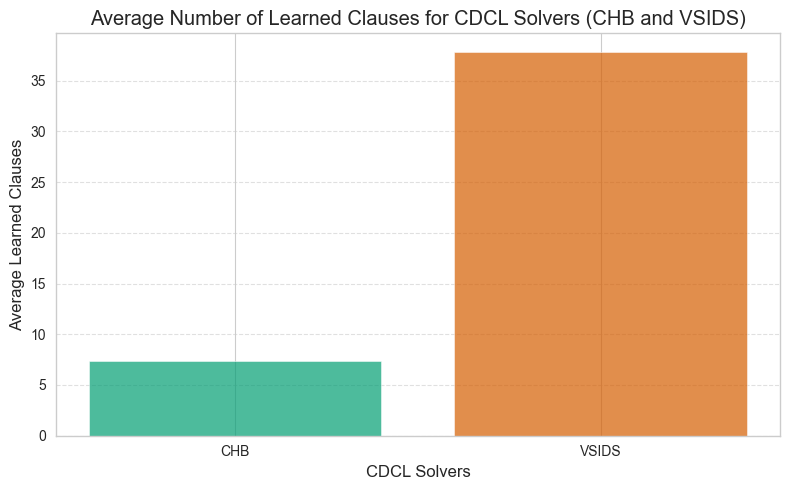

In [89]:

learned_clauses_averages = {
    "CHB": averages["CHB_Learned_Clauses"],
    "VSIDS": averages["VSIDS_Learned_Clauses"]
}

# Extract data for plotting
cdcl_solvers = list(learned_clauses_averages.keys())
learned_clauses_values = list(learned_clauses_averages.values())

# Plot the bar graph for learned clauses
plt.figure(figsize=(8, 5))
plt.bar(cdcl_solvers, learned_clauses_values, color=[chb_color, vsids_color], alpha=0.7)
plt.title("Average Number of Learned Clauses for CDCL Solvers (CHB and VSIDS)")
plt.xlabel("CDCL Solvers")
plt.ylabel("Average Learned Clauses")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


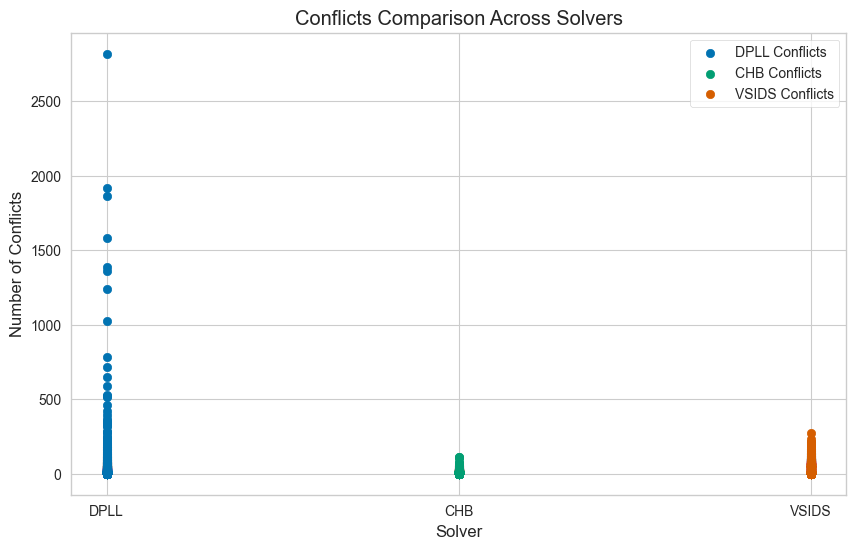

In [90]:
# Scatter plot for conflicts for DPLL, CHB, and VSIDS
plt.figure(figsize=(10, 6))
plt.scatter(["DPLL"] * len(df), df["basic_DPLL_conflicts"], color=dpll_color, label="DPLL Conflicts")
plt.scatter(["CHB"] * len(df), df["CHB_conflicts_counter"], color=chb_color, label="CHB Conflicts")
plt.scatter(["VSIDS"] * len(df), df["VSIDS_conflicts_counter"], color=vsids_color, label="VSIDS Conflicts")
plt.title("Conflicts Comparison Across Solvers")
plt.xlabel("Solver")
plt.ylabel("Number of Conflicts")
plt.legend()
plt.show()


In [91]:
data_chb = pd.read_csv('experiments/cbh_history.csv')

# Create a DataFrame
df_chb = pd.DataFrame(data_chb)

data_vsids = pd.read_csv('experiments/vsids_history.csv')

# Create a DataFrame
df_vsids = pd.DataFrame(data_vsids)

# Convert datetime column to datetime objects
df_chb['datetime'] = pd.to_datetime(df_chb['datetime'], errors='coerce')
df_vsids['datetime'] = pd.to_datetime(df_vsids['datetime'], errors='coerce')

# Aggregate by 1-minute intervals, summing counts
df_aggregated_vsids = df_vsids.set_index('datetime').resample('1T').sum().reset_index()
df_aggregated_chb = df_chb.set_index('datetime').resample('1T').sum().reset_index()

print(df_chb.head)
print(df_chb.columns)
print(df_chb['datetime'].dtype)

<bound method NDFrame.head of                sudoku event_type  count                   datetime
0    .4...1....3...4.   CONFLICT      1 2024-11-20 09:14:49.763486
1    ..32..1..1..23..   CONFLICT      1 2024-11-20 09:14:49.781554
2    ....24.33.42....   CONFLICT      1 2024-11-20 09:14:49.791557
3    1......42......3   CONFLICT      1 2024-11-20 09:14:49.801415
4    ....3.1..3.4....   CONFLICT      1 2024-11-20 09:14:49.809721
..                ...        ...    ...                        ...
995  4......23......4   CONFLICT      1 2024-11-20 09:14:50.663149
996  2..43......34..2   CONFLICT      1 2024-11-20 09:14:50.675899
997  ...1.4....3.4...   CONFLICT      1 2024-11-20 09:14:50.685636
998  ..21...43...21..   CONFLICT      1 2024-11-20 09:14:50.692137
999  .21....24....14.   CONFLICT      1 2024-11-20 09:14:50.698284

[1000 rows x 4 columns]>
Index(['sudoku', 'event_type', 'count', 'datetime'], dtype='object')
datetime64[ns]


/var/folders/1d/yj549hgd2xq52yvm78rh_b900000gn/T/ipykernel_1590/1339109210.py:16: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_aggregated_vsids = df_vsids.set_index('datetime').resample('1T').sum().reset_index()
/var/folders/1d/yj549hgd2xq52yvm78rh_b900000gn/T/ipykernel_1590/1339109210.py:17: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_aggregated_chb = df_chb.set_index('datetime').resample('1T').sum().reset_index()


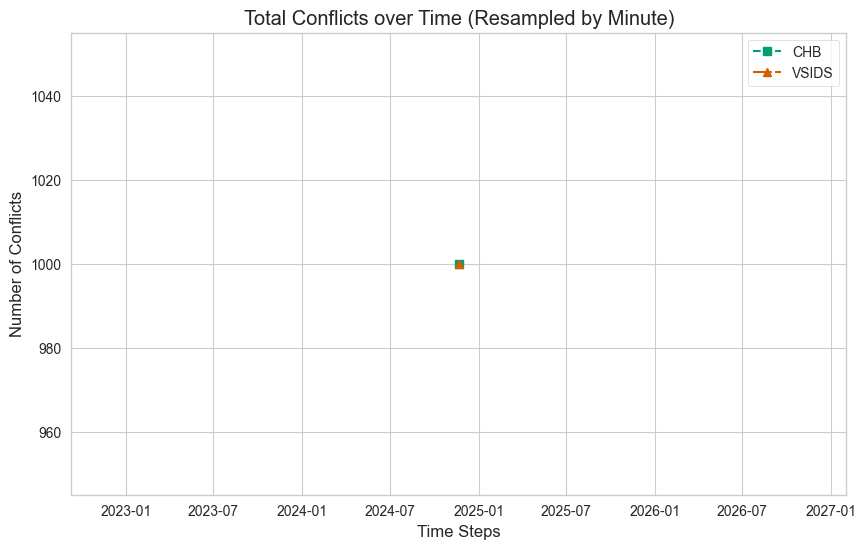

In [92]:
time_steps_chb = df_aggregated_chb['datetime'].to_numpy()
conflicts_chb = df_aggregated_chb['count'].to_numpy()

conflicts_vsids = df_aggregated_vsids['count'].to_numpy()
time_steps_vsids = df_aggregated_vsids['datetime'].to_numpy()


# Plotting conflicts over time
plt.figure(figsize=(10, 6))
plt.plot(time_steps_vsids, conflicts_chb, marker='s', linestyle='--', label="CHB", color=chb_color)
plt.plot(time_steps_vsids, conflicts_vsids, marker='^', linestyle='-.', label="VSIDS", color=vsids_color)

# Graph details
plt.title("Total Conflicts over Time (Resampled by Minute)")
plt.xlabel("Time Steps")
plt.ylabel("Number of Conflicts")
plt.legend()
plt.grid(True)
plt.show()